In [6]:
#import libaries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import manifold
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [44]:
#Implement PCA
def pca(data):
    mean_vec = np.mean(data,axis=0) #computing the mean of both vectors, axis=0 in order to calculate columns indivisually
    cov_mat = (data - mean_vec).T.dot((data - mean_vec)) / (data.shape[0]-1) #computing the covariance matrix
    e_vals, e_vecs = np.linalg.eig(cov_mat) #calculating eigenvalues and eigenvectors
    sort = e_vals.argsort()[::-1] #make sure the order of the eigenvalues (the projected variance) is decreasing and the eigenvectors have the same order as their associated eigenvalues
    evals = e_vals[sort]
    evecs = e_vecs[:,sort]
    return evals, evecs

In [45]:
#Perform PCA on the murder dataset

murderdata = np.loadtxt('murderdata2d.txt')

means = np.mean(murderdata, axis = 0) #calculating the mean of both columns instead of the mean of all together
murderdata_Norm = murderdata - means

evals, evecs = pca(murderdata_Norm)

print('evals', evals)
print('evecs', evecs)

evals [98.73614228  0.36319983]
evecs [[-0.1054526  -0.99442433]
 [-0.99442433  0.1054526 ]]


In [29]:
#Perform PCA on the pesticide dataset. Make a plot of variance versus PC index, where you should see the variancestabilizing

x = murderdata_Norm[:, 0]
y = murderdata_Norm[:, 1]

# Compute the corresponding standard deviations
s0 = np.sqrt(evals[0])
s1 = np.sqrt(evals[1])

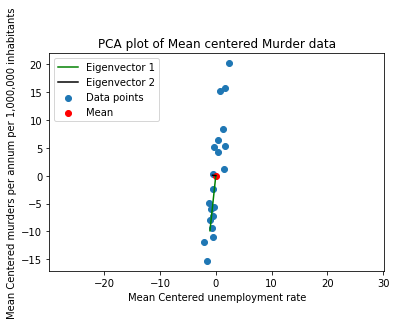

In [46]:
# Producing the plot
plt.scatter(x, y, label = 'Data points')
plt.axis('equal')
plt.scatter(0,0, label = 'Mean', color = 'red') # The mean for the normalized data is 0,0
plt.plot([0, s0*evecs[0,0]], [0, s0*evecs[1,0]], 'green', label = 'Eigenvector 1') # Plotting the first eigenvector
plt.plot([0, s1*evecs[0,1]], [0, s1*evecs[1,1]], 'black', label = 'Eigenvector 2') # Plotting the second eigenvector
plt.legend(loc=2)
plt.title('PCA plot of Mean centered Murder data')
plt.ylabel('Mean Centered murders per annum per 1,000,000 inhabitants')
plt.xlabel('Mean Centered unemployment rate')
plt.show()

In [32]:
#Perform PCA on the pesticide dataset. Make a plot of variance versus PC index, where you should see the variance
#stabilizing (capturing primarily noise).
#You can determine the cumulative normalized variance by normalizing the variance along all PCs
#such that the sum of all variances is 1, and then capture how large a proportion of the variance
#is described by the first, second, etc PC. Plot the cumulative variance versus the number of used
#PCs. How many PCs (dimensions) do you need to capture 90% of the variance in your dataset?
#95%?

In [33]:
dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
x_train = dataTrain[:, :-1]
means = np.mean(x_train, axis=0) #calculating the mean of both columns instead of the mean of all together
x_train_Norm = x_train - means #mean centering

In [34]:
evals, evecs = pca(x_train_Norm)

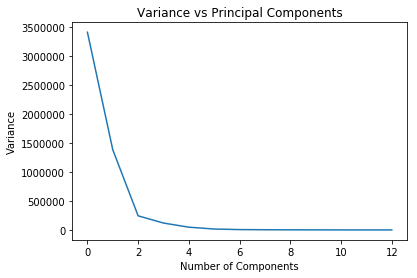

In [35]:
plt.plot(evals)
plt.title('Variance vs Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.show()

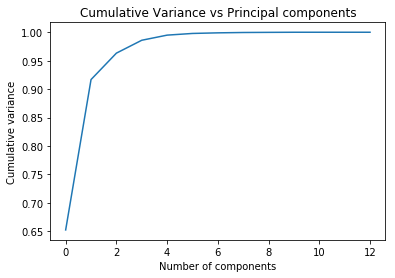

In [36]:
c_var = np.cumsum(evals/np.sum(evals))
plt.plot(c_var)
plt.title('Cumulative Variance vs Principal components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance');
plt.show()

In [43]:
c_var[0:10]

print('cumulative variance: ', c_var)

cumulative variance:  [0.65232418 0.91676936 0.96325171 0.98591075 0.99491908 0.99788133
 0.99894743 0.99955754 0.99979513 0.99998844 0.99999496 1.
 1.        ]


In [41]:
#project the Pesticide dataset onto the rst 2 principal components.
def mds(data, d):
    evals, evecs = pca(data)
    projection = np.dot(data, evecs[:, :d])
    return projection

projection = mds(x_train_Norm, 2)

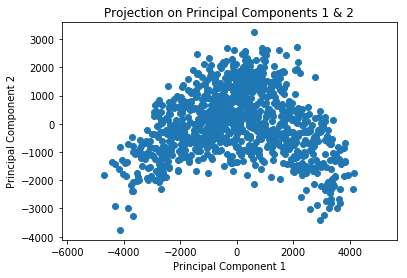

In [42]:
plt.scatter(projection[:, 0], projection[:, 1])
plt.axis('equal')
plt.title('Projection on Principal Components 1 & 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()